In [1]:
# load packages
import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

1.12.0


## Load Data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print("Train:", x_train.shape, y_train.shape)
print("Test:", x_test.shape, y_test.shape)

Train: (60000, 28, 28) (60000,)
Test: (10000, 28, 28) (10000,)


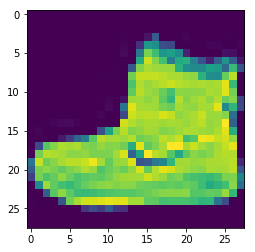

In [4]:
# view one of the samples
plt.imshow(x_train[0])

In [5]:
# create validation dataset
(x_train, x_val) = x_train[2000:], x_train[:2000]
(y_train, y_val) = y_train[2000:], y_train[:2000]

print("Validation:", x_val.shape, y_val.shape)
print("Test:", x_train.shape, y_train.shape)

Validation: (2000, 28, 28) (2000,)
Test: (58000, 28, 28) (58000,)


In [6]:
x_train[0].shape, y_train.shape

((28, 28), (58000,))

In [7]:
# reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)
x_val = x_val.reshape(x_val.shape[0], w, h, 1)

In [8]:
num_classes = 10

In [9]:
# one-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

In [10]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((58000, 28, 28, 1),
 (58000, 10),
 (10000, 28, 28, 1),
 (10000, 10),
 (2000, 28, 28, 1),
 (2000, 10))

## Convolutional Neural Network

In [11]:
# initiate a sequential model
baseline_model = tf.keras.Sequential()

In [12]:
# add a convolution block
baseline_model.add(tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=2,
    padding="same",
    activation="relu",
    input_shape=(28, 28, 1)))

# add a maxpooling layer
baseline_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# add a dropout layer
baseline_model.add(tf.keras.layers.Dropout(rate=0.3))

# add another convolutional block
baseline_model.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=2,
    padding="same",
    activation="relu"))

# add a maxpooling layer
baseline_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# add a dropout layer
baseline_model.add(tf.keras.layers.Dropout(rate=0.3))

# now flatten the output
baseline_model.add(tf.keras.layers.Flatten())

# add a dense layer with relu activation
baseline_model.add(tf.keras.layers.Dense(256, activation="relu"))

# add a dropout layer
baseline_model.add(tf.keras.layers.Dropout(rate=0.5))

# now add the final output layer: softmax layer
baseline_model.add(tf.keras.layers.Dense(num_classes, activation="softmax"))

# compile the model
baseline_model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

# train the model
hist = baseline_model.fit(x_train,
                  y_train,
                  batch_size=64,
                  epochs=20,
                  validation_data=(x_val, y_val),
                  callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

Train on 58000 samples, validate on 2000 samples
Epoch 1/20
57920/58000 [============================>.] - ETA: 0s - loss: 3.4247 - acc: 0.6323
Epoch 00001: val_loss improved from inf to 0.48341, saving model to weights/fmnist_cnn_model__0.84.weights.best.h5
58000/58000 [==============================] - 33s 563us/step - loss: 3.4207 - acc: 0.6326 - val_loss: 0.4834 - val_acc: 0.8370
Epoch 2/20
57920/58000 [============================>.] - ETA: 0s - loss: 0.5504 - acc: 0.7958
Epoch 00002: val_loss improved from 0.48341 to 0.39054, saving model to weights/fmnist_cnn_model__0.86.weights.best.h5
58000/58000 [==============================] - 33s 570us/step - loss: 0.5503 - acc: 0.7958 - val_loss: 0.3905 - val_acc: 0.8610
Epoch 3/20
57920/58000 [============================>.] - ETA: 0s - loss: 0.4747 - acc: 0.8241
Epoch 00003: val_loss improved from 0.39054 to 0.36717, saving model to weights/fmnist_cnn_model__0.86.weights.best.h5
58000/58000 [==============================] - 33s 573us/

## Visualization

In [15]:
hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

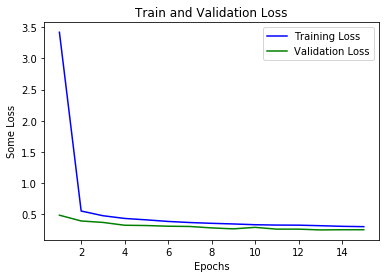

In [18]:
loss = hist.history["loss"]
val_loss = hist.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "b", label="Training Loss", color="blue")
plt.plot(epochs, val_loss, "b", label="Validation Loss", color="green")
plt.xlabel("Epochs")
plt.ylabel("Some Loss")
plt.title("Train and Validation Loss")
plt.legend()
plt.show()

## Evaluation on Test Set

In [13]:
score = baseline_model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 1s 135us/step


In [14]:
print("Test Accuracy = ", score[1])

Test Accuracy =  0.9043
